## Chapter 7 - Exercise 1: Trực quan hóa dữ liệu Chipotle

#### Cho dữ liệu https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

Nhà hàng Chipotle cần phân tích dữ liệu bán được trong ngày diễn ra khuyến mãi để có thể điều chỉnh thực đơn và thực hiện các chương trình khuyến mãi phù hợp.

Dữ liệu được cung cấp trong file chipotle.tsv, hãy thực hiện các yêu cầu sau:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Câu 1: Đọc dữ liệu và gán vào biến chipo 
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'  
chipo = pd.read_csv(url, sep = '\t')
# Hiển thị 10 dòng đầu của dữ liệu
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [3]:
chipo.tail(10)

,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [4]:
chipo.shape

(4622, 5)

In [5]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [6]:
# Câu 2: 
# a) Đổi kiểu dữ liệu của cột item_price sang kiểu số thực 


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>order_id</th>
      <th>quantity</th>
      <th>item_name</th>
      <th>choice_description</th>
      <th>item_price</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>1</td>
      <td>Chips and Fresh Tomato Salsa</td>
      <td>NaN</td>
      <td>2.39</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>1</td>
      <td>Izze</td>
      <td>[Clementine]</td>
      <td>3.39</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1</td>
      <td>1</td>
      <td>Nantucket Nectar</td>
      <td>[Apple]</td>
      <td>3.39</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1</td>
      <td>1</td>
      <td>Chips and Tomatillo-Green Chili Salsa</td>
      <td>NaN</td>
      <td>2.39</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2</td>
      <td>2</td>
      <td>Chicken Bowl</td>
      <td>[Tomatillo-Red Chili Salsa (Hot), [Black Beans...</td>
      <td>16.98</td>
    </tr>
  </tbody>
</table>
</details>

In [7]:
# b) Tạo cột revenue, với revenue = quantity * item_price


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>order_id</th>
      <th>quantity</th>
      <th>item_name</th>
      <th>choice_description</th>
      <th>item_price</th>
      <th>revenue</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>1</td>
      <td>Chips and Fresh Tomato Salsa</td>
      <td>NaN</td>
      <td>2.39</td>
      <td>2.39</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>1</td>
      <td>Izze</td>
      <td>[Clementine]</td>
      <td>3.39</td>
      <td>3.39</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1</td>
      <td>1</td>
      <td>Nantucket Nectar</td>
      <td>[Apple]</td>
      <td>3.39</td>
      <td>3.39</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1</td>
      <td>1</td>
      <td>Chips and Tomatillo-Green Chili Salsa</td>
      <td>NaN</td>
      <td>2.39</td>
      <td>2.39</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2</td>
      <td>2</td>
      <td>Chicken Bowl</td>
      <td>[Tomatillo-Red Chili Salsa (Hot), [Black Beans...</td>
      <td>16.98</td>
      <td>33.96</td>
    </tr>
  </tbody>
</table>
</details>

In [8]:
# Câu 3
# a) Vẽ biểu đồ countplot cho biết 5 món được gọi nhiều nhất 
# (có title, xlabel, ylabel và xticks)


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
<img src="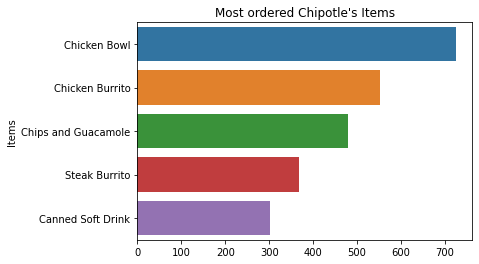
">
</details>

In [9]:
# b) Vẽ biểu đồ barplot cho biết 5 món được gọi nhiều nhất và trung bình item_price


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
<img src="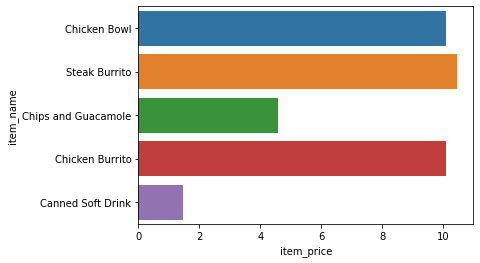
">
</details>

In [10]:
# c) Vẽ biểu đồ barplot cho biết 5 món được gọi nhiều nhất và trung bình revenue


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
<img src="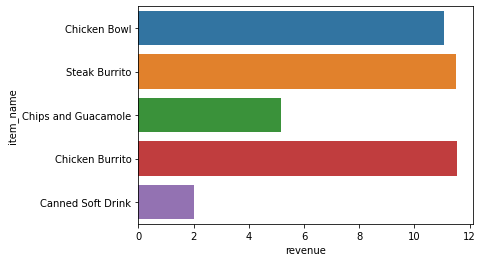
">
</details>

In [11]:
# Câu 4: Nhóm các đơn hàng theo order_id, và tính tổng số lượng gọi 
# và tổng giá trị của mỗi đơn hàng, 
# in kết quả


In [12]:
# xem xét hệ số tương quan giữa quantity và revenue


In [13]:
# Câu 5: 
# a) Từ câu 4, hãy vẽ scatterplot với x là revenue, 
# và y là quantity, có title, xlabel, ylabel
# Bạn có nhận xét gì qua biểu đồ này 


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
<img src="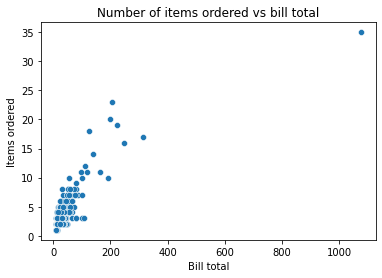
">
</details>

In [14]:
# b) Hãy vẽ scatterplot với x là revenue, 
# và y là quantity, có title, xlabel, ylabel, đặt plt.xscale('log')
# Bạn có nhận xét gì qua biểu đồ này 


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
<img src="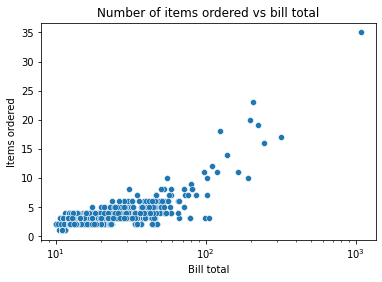
">
</details>

In [15]:
# c) Hãy vẽ scatterplot với x là revenue, 
# và y là quantity, có hue là order_id
# Bạn có nhận xét gì qua biểu đồ này 


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
<img src="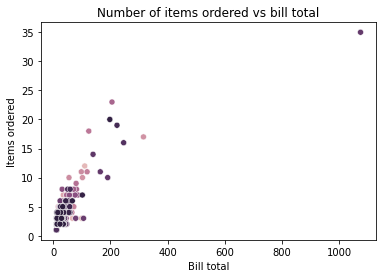
">
</details>

In [16]:
# d) Hãy vẽ regplot với x là revenue, 
# và y là quantity
# Bạn có nhận xét gì qua biểu đồ này 


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
<img src="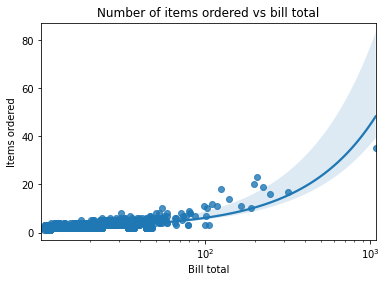
">
</details>

In [17]:
# Câu 6: vẽ barplot với x là các món ăn, 
# và y là tổng thành tiền. Vẽ cho 5 món có tổng thành tiền lớn nhất


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
<img src="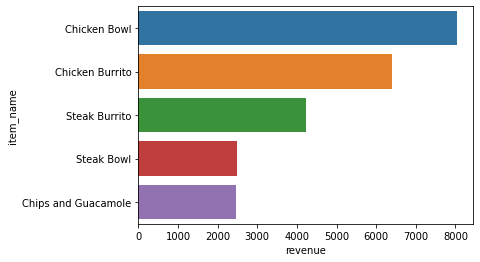
">
</details>

In [18]:
# Câu 7: Vẽ displot cho cột item_price
# vẽ có KDE và bins=10
# cho nhận xét


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
<img src="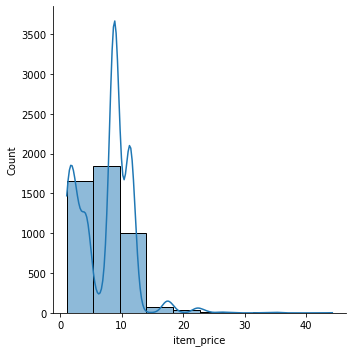
">
</details>

In [19]:
# Câu 8: 
# Chia dữ liệu chipo ra làm 3 bin, chia theo cột item_price và lưu vào cột interval
# Vẽ countplot cho cột interval
# cho nhận xét
# chipo['interval'] = pd.cut(x=chipo.item_price, bins=3)


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
<img src="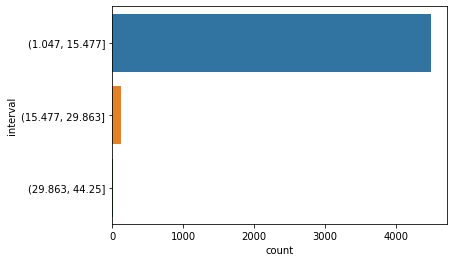
">
</details>